In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
df_fico = pd.read_csv("fico.csv")
df_region = pd.read_csv("region.csv")

In [3]:
df_fico.head(10)

,acct_id,FICO
0,1,768
1,2,850
2,3,677
3,4,843
4,5,796
5,6,669
6,7,805
7,8,850
8,9,838
9,10,850


In [4]:
df_fico.shape

(100013, 2)

In [5]:
df_fico.describe()

,acct_id
count,100013.000000
mean,49996.449842
std,28868.457180
min,1.000000
25%,24999.000000
50%,49994.000000
75%,74997.000000
max,100000.000000


In [6]:
df_fico.isna().sum()

acct_id        0
FICO       29615
dtype: int64

In [7]:
df_fico["FICO"] = df_fico["FICO"].replace([np.inf, -np.inf], np.nan)

In [8]:
df_fico.acct_id.value_counts()

190      2
30504    2
30508    2
30503    2
30505    2
        ..
70327    1
72374    1
66229    1
68276    1
2047     1
Name: acct_id, Length: 100000, dtype: int64

In [9]:
df_fico.duplicated().sum()

13

In [10]:
df_fico.loc[df_fico.duplicated(), :]

,acct_id,FICO
140,140,752
190,189,745
192,190,828
194,191,752
196,192,850
30506,30501,773
30508,30502,798
30510,30503,820
30512,30504,NaN
30514,30505,820


In [11]:
df_fico.drop_duplicates(inplace=True)

In [12]:
df_fico.shape

(100000, 2)

In [13]:
df_fico.isnull().sum()

acct_id        0
FICO       29612
dtype: int64

In [14]:
#df_fico.FICO.apply(float.is_integer).all()
#True

In [15]:
df_fico["FICO"] = df_fico["FICO"].fillna(0)

In [16]:
df_fico.isnull().sum()

acct_id    0
FICO       0
dtype: int64

In [17]:
df_fico.FICO.dtype

dtype('O')

In [18]:
df_fico.groupby('FICO').count()

,acct_id
FICO,
0,29612
420,1
433,1
439,1
440,1
...,...
848,528
849,546
850,12059


In [19]:
df_fico = df_fico.replace(to_replace=["AA","SSS"], value=np.nan)

In [20]:
df_fico["FICO"] = df_fico["FICO"].apply(pd.to_numeric, errors='coerce', downcast='float')

In [21]:
df_fico["FICO"].dtype

dtype('float64')

In [22]:
df_fico["FICO"].isna().value_counts()

False    99998
True         2
Name: FICO, dtype: int64

In [23]:
for i in df_fico["FICO"]:
    if i == np.nan:
        print("found at position",i)

In [24]:
df_fico["FICO"] = pd.to_numeric(df_fico["FICO"], downcast='integer')

In [25]:
df_fico["FICO"].dtype

dtype('float64')

In [26]:
print(df_fico["FICO"][10])

0.0


In [27]:
df_fico.isnull().sum()

acct_id    0
FICO       2
dtype: int64

In [28]:
df_fico.dropna(axis=0)

,acct_id,FICO
0,1,768.0
1,2,850.0
2,3,677.0
3,4,843.0
4,5,796.0
...,...,...
100007,99995,0.0
100008,99996,0.0
100009,99997,0.0
100010,99998,0.0


In [29]:
df_fico.isnull().sum()

acct_id    0
FICO       2
dtype: int64

In [30]:
df_fico.FICO.replace(np.nan, 0)

0         768.0
1         850.0
2         677.0
3         843.0
4         796.0
          ...  
100008      0.0
100009      0.0
100010      0.0
100011      0.0
100012      0.0
Name: FICO, Length: 100000, dtype: float64

In [31]:
df_fico.isnull().sum()

acct_id    0
FICO       2
dtype: int64

In [32]:
np.nansum(df_fico["FICO"]), np.nanmin(df_fico["FICO"]), np.nanmax(df_fico["FICO"])

(55305593.0, 0.0, 850.0)

In [33]:
df_fico.fillna(method='ffill', axis=1)

,acct_id,FICO
0,1.0,768.0
1,2.0,850.0
2,3.0,677.0
3,4.0,843.0
4,5.0,796.0
...,...,...
100008,99996.0,0.0
100009,99997.0,0.0
100010,99998.0,0.0
100011,99999.0,99999.0


In [34]:
df_fico.head(20)

,acct_id,FICO
0,1,768.0
1,2,850.0
2,3,677.0
3,4,843.0
4,5,796.0
5,6,669.0
6,7,805.0
7,8,850.0
8,9,838.0
9,10,850.0


In [35]:
def mark_missing(x):
    if x == 0.0:
        return "Missing"
    elif x == "nan":
        return "Missing"
    else:
        return x

In [36]:
df_fico["FICO"] = df_fico["FICO"].apply(mark_missing)

# Q 1.1

In [37]:
df_fico.head(20)

,acct_id,FICO
0,1,768.0
1,2,850.0
2,3,677.0
3,4,843.0
4,5,796.0
5,6,669.0
6,7,805.0
7,8,850.0
8,9,838.0
9,10,850.0


In [38]:
df_fico.drop(df_fico[df_fico['FICO'] == "Missing"].index, inplace = True)

In [39]:
df_fico.head()

,acct_id,FICO
0,1,768.0
1,2,850.0
2,3,677.0
3,4,843.0
4,5,796.0


In [40]:
df_fico.to_csv("cleaned_fico_scores")

In [41]:
df_fico["FICO"].value_counts()

850.0    12059
836.0      865
845.0      836
828.0      746
841.0      668
         ...  
496.0        1
485.0        1
487.0        1
488.0        1
420.0        1
Name: FICO, Length: 375, dtype: int64

In [42]:
histdata = df_fico["FICO"]

# Q 1.3

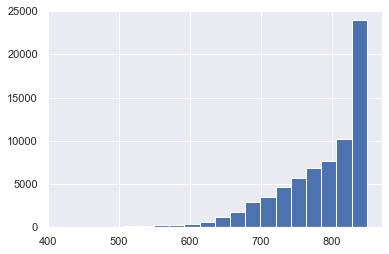

In [43]:
plt.hist(histdata, bins = 20)
plt.show()

From the distribution displayed above, we can clearly note the kind of negative exponential distribution being followed by the data. And that the number of defaulters are minimal, i.e. majority id's tend to have fairly nice FICO score resulting in very less id's having a poor and fair FICO score.

A large count of id's have "exceptionally well" FICO scores followed by id's having "Very Good" scores. Ranking third we have "Good" scores followed by "Fair" and "Poor" scores respectively.

The above mentioned analysis is also evident from the count-plot displayed after few cells.

Note : The above mentioned bucketing conventions are listed below along with reasoning.

# Q 1.2



# Reasoning:
FICO score ranges between 300 and 850 and there are various factors involved in calculation of the FICO score like payment history, amounts Owed, length of credit history, credit mix, new credit accounting for 35%, 30%, 15%, 10% and 10% respectively.

According to Forbes Advisor, FICO scores are classified into five categories that represent a consumer’s likelihood of repaying debts and the amount of risk he poses to lenders.

# Excellent: 800 and above.
# Very good: 740 to 799.
# Good: 670 to 739.
# Fair: 580 to 669.
# Poor: 579 and below.

In [44]:
def bucketing(x):
    if x>=800.0:
        return "Exceptional"
    elif x<=799.0 and x>=744.0:
        return "Very_Good"
    elif x<=739.0 and x>=670.0:
        return "Good"
    elif x<=669.0 and x>=580.0:
        return "Fair"
    elif x<=579.0:
        return "Poor"
    else:
        return x

In [45]:
df_fico["FICO"] = df_fico["FICO"].apply(bucketing)

In [46]:
df_fico["FICO"] = df_fico["FICO"].astype(str)

In [47]:
df_fico["FICO"].value_counts()

Exceptional    36928
Very_Good      17293
Good           10979
Fair            3398
Poor             753
742.0            294
740.0            255
741.0            243
743.0            243
nan                2
Name: FICO, dtype: int64

In [48]:
def conv(x):
    if x =="742.0":
        return "Very_Good"
    elif x =="740.0":
        return "Very_Good"
    elif x =="741.0":
        return "Very_Good"
    elif x =="743.0":
        return "Very_Good"
    if x =="nan":
        return "Very_Good"
    else: return x

In [49]:
df_fico["FICO"] = df_fico["FICO"].apply(conv)

In [50]:
df_fico.head()

,acct_id,FICO
0,1,Very_Good
1,2,Exceptional
2,3,Good
3,4,Exceptional
4,5,Very_Good


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


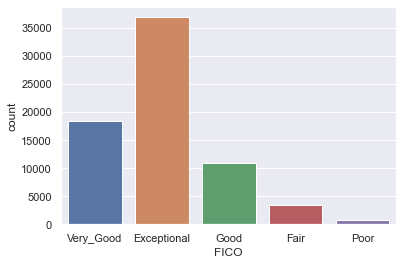

In [51]:
sns.countplot(df_fico["FICO"])
plt.show()

In [52]:
df_fico["FICO"].value_counts()

Exceptional    36928
Very_Good      18330
Good           10979
Fair            3398
Poor             753
Name: FICO, dtype: int64

In [53]:
df_fico.shape

(70388, 2)

In [54]:
print("Number of customers being categorized into: \nExcellent FICO scores are 36928, occupying",(36928/70388)*100,"% of total count of customers from data available (excludes missing data id's)",
      "\nVery Good FICO scores are 18330, occupying",(18330/70388)*100,"%"," of total count of customers from data available (excludes missing data id's)",
"\nGood FICO scores are 10979, occupying",(10979/70388)*100,"%"," of total count of customers from data available (excludes missing data id's)",
  "\nFair FICO scores are 3398, occupying",(3398/70388)*100,"%"," of total count of customers from data available (excludes missing data id's)",
     "\nPoor FICO scores are 753, occupying",(753/70388)*100,"%"," of total count of customers from data available (excludes missing data id's)",)    

Number of customers being categorized into: 
Excellent FICO scores are 36928, occupying 52.46348809456157 % of total count of customers from data available (excludes missing data id's) 
Very Good FICO scores are 18330, occupying 26.041370688185484 %  of total count of customers from data available (excludes missing data id's) 
Good FICO scores are 10979, occupying 15.59782917542763 %  of total count of customers from data available (excludes missing data id's) 
Fair FICO scores are 3398, occupying 4.827527419446496 %  of total count of customers from data available (excludes missing data id's) 
Poor FICO scores are 753, occupying 1.0697846223788146 %  of total count of customers from data available (excludes missing data id's)


In [55]:
df_scores = pd.read_csv("cleaned_fico_scores")

In [56]:
df_region.head()

,acct_id,region
0,1,New York
1,2,Dallas
2,3,Los Angeles
3,4,Chicago
4,5,Philadelphia


In [57]:
temp_inner= pd.merge(df_scores, df_region, on='acct_id', how='inner') 

In [58]:
temp_inner.isna().sum()

Unnamed: 0    0
acct_id       0
FICO          2
region        0
dtype: int64

In [59]:
temp_inner.isna().sum()

Unnamed: 0    0
acct_id       0
FICO          2
region        0
dtype: int64

In [60]:
temp_inner.head()

,Unnamed: 0,acct_id,FICO,region
0,0,1,768.0,New York
1,1,2,850.0,Dallas
2,2,3,677.0,Los Angeles
3,3,4,843.0,Chicago
4,4,5,796.0,Philadelphia


In [61]:
temp_inner.drop(columns=temp_inner.columns[0], axis=1, inplace=True)

In [62]:
temp_inner.loc[temp_inner.duplicated(), :]

,acct_id,FICO,region
25,27,534.0,Los Angeles
1208,2575,573.0,Los Angeles
2082,5011,573.0,Los Angeles
2640,5737,550.0,Los Angeles
3113,6291,605.0,Los Angeles
4299,7673,601.0,Los Angeles
5156,8661,605.0,Los Angeles
6542,10318,576.0,Los Angeles
7353,11283,552.0,Los Angeles
8393,13304,570.0,Los Angeles


In [63]:
temp_inner.drop_duplicates(inplace=True)

In [64]:
temp_inner.value_counts()

acct_id  FICO   region      
1        768.0  New York        1
66319    743.0  Dallas          1
66325    850.0  Chicago         1
66324    838.0  Philadelphia    1
66323    836.0  Charlotte       1
                               ..
35799    849.0  Houston         1
35800    811.0  Philadelphia    1
35801    720.0  Chicago         1
35803    743.0  Houston         1
99992    850.0  Los Angeles     1
Length: 70510, dtype: int64

In [65]:
temp_inner.shape

(70512, 3)

In [66]:
temp = temp_inner

In [67]:
temp = temp.dropna()

# Q 2.1

In [68]:
temp

,acct_id,FICO,region
0,1,768.0,New York
1,2,850.0,Dallas
2,3,677.0,Los Angeles
3,4,843.0,Chicago
4,5,796.0,Philadelphia
...,...,...,...
70555,99986,836.0,Phoenix
70556,99987,850.0,Los Angeles
70557,99989,850.0,Los Angeles
70558,99990,830.0,Chicago


In [69]:
avg = temp.groupby('region').mean()

In [70]:
avg

,acct_id,FICO
region,,
Charlotte,50320.351572,785.154280
Chicago,49723.128320,785.643043
Dallas,50248.634126,782.102021
Houston,50406.506440,786.005803
Los Angeles,50582.031080,787.223002
New York,50181.051336,785.065903
Philadelphia,50416.117249,785.773845
Phoenix,50986.812660,788.170231
San Antonio,50401.320351,784.508277


In [71]:
avg.drop(columns=["acct_id"], inplace=True)

# Q 2.2

In [72]:
avg.loc[["Chicago","San Diego"]]

,FICO
region,
Chicago,785.643043
San Diego,784.076447
